Miguel is a brand manager facing a diffcult decision. The top two candidates for his brand's
next major product initiative all seem quite likely to be successful, but due to budget con-
straints he must select only one. He has asked you to provide an analysis of the different
initiatives to inform his selection decision. The following is information related to each of
the initiatives:


Initiative 1

• The development cost is uniformly distributed between $2 and $4 million.

• There are 20 potential clients for the product, and each one will purchase it with
probability 0.70 at a price of $500,000 which is fixed.



Initiative 2

• The development cost depends on the state of its development team. With probability
0.80, the assigned development team is strong and thus the cost is normally distributed
with mean $1 million and standard deviation $100,000. With probability 0.20, the
assigned development team is weak and thus the cost is normally distributed with
mean $2 million and standard deviation $500,000.

• The firm has much more discretion on pricing. There are 220 potential clients for the
product, and each one will purchase it with probability pi(p) which depends on the
price p. This probability function is given by pi(p) = 1- p/$100000 . Here the highest price
that can be charged is $100,000, and it will lead to no customers purchasing it.

(i) For Initiative 1, what is the expected profit?

(ii) For Initiative 1, what is the likelihood that profits will exceed $5 million?

(iii) For Initiative 2, create a visualization of the cost distribution (e.g., a histogram).


(iv) For Initiative 2, what is the likelihood that its cost exceeds $2.5 million?.
10
(v) For Initiative 2, if the price is set to $30,000, what is the expected profit?


(vi) For Initiative 2, what price maximizes expected profits?


(vii) For Initiative 2, what are the expected profits associated with the optimal price found
in part (vi)?


(viii) For Initiative 2, what is the likelihood that profits will exceed $5 million under the
optimal price found in part (vi)? 


(ix) Suppose Miguel wants at least a 15% chance of profits exceeding $5 million. Given your
analysis of the two initiatives, discuss the trade-off he faces. In particular, how much profit
must he be willing to forgo in order to meet this desired objective?

In [6]:
import numpy as np


In [2]:
#initiative 1
#simulate development cost
N=10000
DC1=np.random.uniform(2000000, 4000000, N)
price1= 500000
client_d1=np.random.binomial(20, .70, N)

In [10]:
#initiative 2
#simulate development cost
M=100000
prob= [0.8,0.2]
DC_strong= np.random.normal(1000000, 100000, (N,100))
DC_weak=np.random.normal(2000000, 500000, (N,100))
is_strong = np.random.choice([True, False], size=(N,100), replace=True, p=[0.80, 0.20])


price2=np.tile(np.arange(1,M+1,1000),(N,1))

In [11]:
DC2=DC_weak.copy()
DC2[is_strong==True]=DC_strong[is_strong==True]

In [12]:
DC2

array([[1099935.95300752,  835418.0657831 ,  977017.16833929, ...,
        1003849.95126591, 1029741.49766446, 1429155.45820303],
       [1000885.72505638,  979555.81954075,  934882.04688777, ...,
        2217405.41883157,  802815.60392709, 1004845.81353243],
       [1828764.10187717, 1078740.08465126,  926296.69056673, ...,
         783078.88912772, 1252187.06019891, 2198557.35258304],
       ...,
       [1169898.52794769, 1123397.59788426, 1140626.93203916, ...,
         933178.37490549, 1032786.47837557, 1107830.77625248],
       [2018121.51038942,  946565.28993336,  906584.97212819, ...,
        1061754.82827467, 2654957.87805635, 1019625.13861902],
       [ 972850.86959845,  916250.75013856, 1066852.812159  , ...,
        1022038.33273064, 1037216.92620585, 1566891.34112396]])

In [13]:
p_client=1-price2/100000
client_d2=np.random.binomial(220, p_client,(N,100))

In [13]:
client_d2

array([[219, 220, 220, ..., 219, 218, 217],
       [220, 220, 220, ..., 216, 218, 220],
       [220, 220, 220, ..., 218, 215, 215],
       ...,
       [220, 220, 220, ..., 218, 218, 217],
       [220, 220, 220, ..., 220, 216, 217],
       [220, 220, 220, ..., 218, 218, 219]])

In [14]:
#profits
#initiative 1
profit_1=price1*client_d1-DC1

In [30]:
np.mean(profit_1)

4005560.6129431427

In [31]:
np.mean(profit_1>5000000)

0.2025

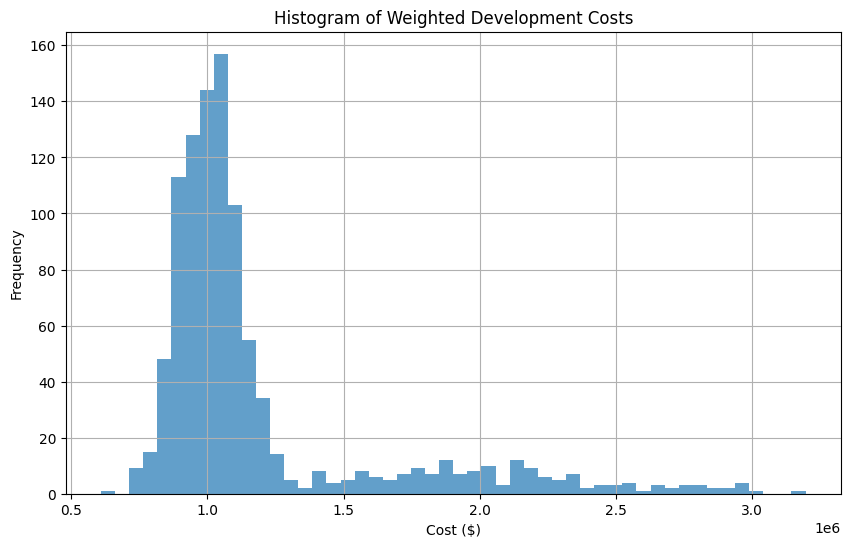

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(DC2[M], bins=50, alpha=0.7)
plt.title("Histogram of Weighted Development Costs")
plt.xlabel("Cost ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [39]:
np.mean(DC2>2500000)

0.0316577

In [ ]:
price2_new=30000
p_client_new=1-price2_new/100000
client_d2_new=np.random.binomial(220, p_client_new, (N,M))

In [50]:
profit_new=client_d2_new*price2_new-DC2
np.mean(profit_new)

3420255.9686904103

In [15]:
profit=client_d2*price2-DC2

48001
4298333.725520409


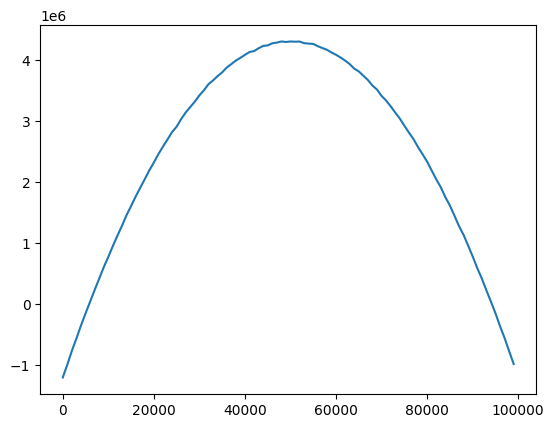

In [20]:
import matplotlib.pyplot as plt
exp_prof = np.mean(profit, axis=0)
plt.plot(np.arange(1,M+1,1000), exp_prof)

idx = np.argmax(exp_prof)
print(np.arange(1, M+1, 1000)[idx])
print(exp_prof[idx])